## Q-обучение

Одним из наиболее популярных алгоритм обучения на основе временных различий является Q-обучение. Агент, который принимает решения на основе $Q$-функции, не требует модель для обучения и выбора действий, т.е. такой агент также свободен от модели (model-free), как и TD-агент. Уравнение Беллмана для значения Q-функции в равновесии записывается как:

$$Q(s,a)=r(s)+\gamma\sum_s'T(s,a,s')\max_{a'}Q(a',s')$$

Уравнение для итерационного обновления значений Q-функции выглядит следующим образом:
$$Q(s,a)\leftarrow Q(s,a)+\alpha(r(s)+\gamma\max_{a'}Q(a',s') - Q(s,a)).$$

<img src="q.png" caption="Алгоритм Q-обучения" >

### Задание 1
Оформим этот алгоритм в виде класса QLearningAgent:

In [1]:
import random, math

import numpy as np
from collections import defaultdict


class QLearningAgent():
    """
    Q-Learning агент

    Замечание: избегайте прямое использование 
    self._q_values, для этого определены 
    функции: get_q_value, set_q_value
    """

    def __init__(self, alpha, epsilon, discount, 
                 get_legal_actions):
        self.get_legal_actions = get_legal_actions
        self._q_values = \
            defaultdict(lambda: defaultdict(lambda: 0))  
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount

    def get_q_value(self, state, action):
        return self._q_values[state][action]

    def set_q_value(self, state, action, value):
        self._q_values[state][action] = value

Добавим нашему агенту возможность вычислять оценки $V$:

In [2]:
def get_value(self, state):
    """
      Возвращает значение функции полезности, 
      рассчитанной по Q[state, action], 
    """
    possible_actions = self.get_legal_actions(state)

    # value = 
    #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
    
     
    value = max([self.get_q_value(state, action) for action in possible_actions])
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    return value

QLearningAgent.get_value = get_value

Стратегия нашего агента будет заключаться в выборе лучшего действия, в соответствии с оценками $Q$:

In [3]:
def get_policy(self, state):
    """
      Выбирает лучшее действие, согласно стратегии.
    """
    possible_actions = self.get_legal_actions(state)
    
    # выбираем лучшее действие, согласно стратегии
    #best_action = 
    #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
    
     
    best_action = None
    for action in possible_actions:
        if best_action is None:
            best_action = action
        elif self.get_q_value(state, action) > self.get_q_value(state, best_action):
            best_action = action
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    return best_action

QLearningAgent.get_policy = get_policy

Для конкретной ситуации мы будем выбирать действие, используя $\epsilon$-жадный подход:

In [4]:
def get_action(self, state):
    """
      Выбирает действие, предпринимаемое в данном 
      состоянии, включая исследование (eps greedy)
      С вероятностью self.epsilon берем случайное 
      действие, иначе действие согласно стратегии 
      (self.get_policy)
    """
    possible_actions = self.get_legal_actions(state)

    # выбираем действие, используя eps-greedy подход
    # action = 
    #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
    
     
    if np.random.random() < self.epsilon:
        action = np.random.choice(possible_actions, 1)[0]
        # alternatively - random.choice(possible_actions)
    else:
        action = self.get_policy(state)
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    return action

QLearningAgent.get_action = get_action

In [5]:
def update(self, state, action, next_state, reward):
    """
      функция Q-обновления 
    """
    # выполняем Q-обновление, 
    # используем методы getQValue и setQValue
    #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
    
     
    t = self.alpha*(reward + self.discount*self.get_value(next_state) - self.get_q_value(state, action))
    reference_qvalue = self.get_q_value(state, action) + t
    self.set_q_value(state, action, reference_qvalue)
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
QLearningAgent.update = update

Тестируем нашего агента на задаче Taxi

In [6]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

In [7]:
def play_and_train(env, agent, t_max=10**4):
    """функция запускает полную игру,
    используя стратегию агента (agent.get_action(s))
    выполняет обновление агента (agent.update(...))
    и возвращает общее вознаграждение
    """
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        # выбираем действие
        # a = 
        #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
        
         
        a = agent.get_action(s)
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        
        next_s, r, done, _ = env.step(a)
        
        # выполняем обновление стратегии
        # agent.update()
        #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
        
         
        agent.update(s, a, next_s, r)
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        
        s = next_s
        total_reward +=r
        if done:
            break
        
    return total_reward

eps = 0.1 mean reward = 4.2
alpha= 0.5


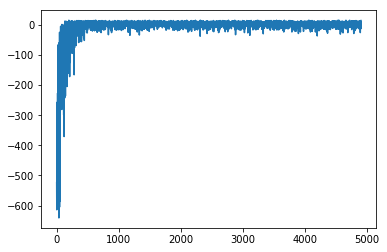

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

agent = QLearningAgent(alpha=0.5, epsilon=0.1,
                       discount=0.9,
                       get_legal_actions=lambda s: range(
                           n_actions))

assert 'get_policy' in dir(agent)
rewards = []
for i in range(5000):
    rewards.append(play_and_train(env, agent))

    if i % 100 == 0:
        clear_output(True)
        print('eps =', agent.epsilon,
              'mean reward =', np.mean(rewards[-10:]))
        print("alpha=", agent.alpha)
        plt.plot(rewards)
        plt.show()

### Задание 2

Рассмотрим задачу CartPole. Это окружение имеет непрерывное множество состояний - попробуем их сгруппировать. Для этого попробуем использовать `round(x, n_digits)` для округления действительных чисел.

начальное состояние: [-0.04406872 -0.04276858  0.04917533 -0.04314902]


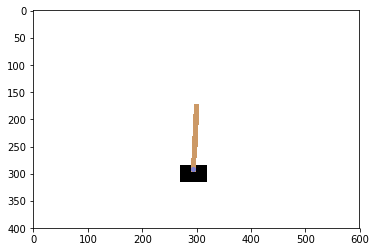

In [9]:
env = gym.make("CartPole-v0")
n_actions = env.action_space.n

print("начальное состояние: %s" % (env.reset()))
plt.imshow(env.render('rgb_array'))

In [10]:
env.close()

Оценим распределение наблюдений -- сыграем несколько эпизодов и запишем состояния.

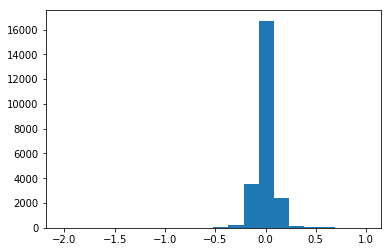

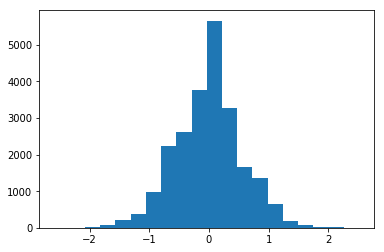

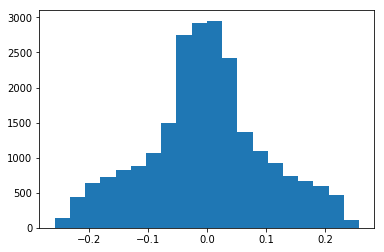

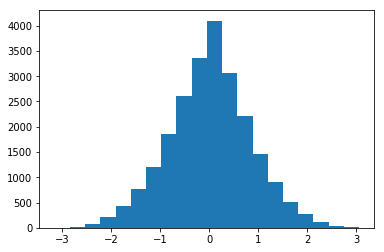

In [11]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        action = env.action_space.sample()
        s, r, done, _ = env.step(action)
        all_states.append(s)
        if done:
            break

all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    plt.hist(all_states[:, obs_i], bins=20)
    plt.show()

Теперь создадим обертку для окружения, которая проводить бинаризацию состояний:

In [12]:
from gym.core import ObservationWrapper


class Binarizer(ObservationWrapper):

    def observation(self, state):

        # state = <round state to some amount digits.>
        # подсказка: используйте round(x,n_digits)
        # необходимо выбрать разные параметры n_digits
        # для каждой размерности
        #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
        
         
        state = [round(state[0], 1), 
                 round(state[1], 2), 
                 round(state[2], 2), 
                 round(state[3], 1)]
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        
        return tuple(state)

In [13]:
env = Binarizer(gym.make("CartPole-v0"))

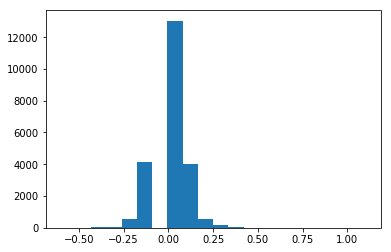

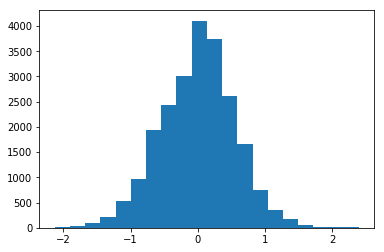

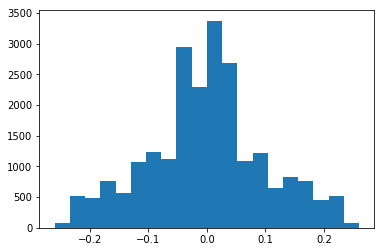

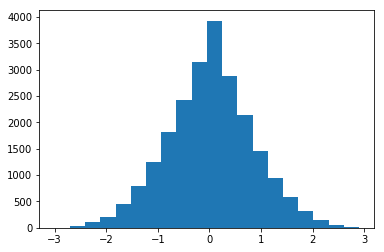

In [14]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        action = env.action_space.sample()
        s, r, done, _ = env.step(action)
        all_states.append(s)
        if done:
            break

all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):

    plt.hist(all_states[:, obs_i], bins=20)
    plt.show()

Обучим нашего Q-агента:
Если бинаризация слишком грубая, агент может не обучаться.
Если бинаризация слишком точная, сходимость процесса обучения может занять слишком большое количество шагов.
Размерность в $10^3$-$10^4$ состояний - оптимальная.
 Хорошим является агент, получающий вознаграждение >= 50.

eps = 0.25 mean reward = 59.72


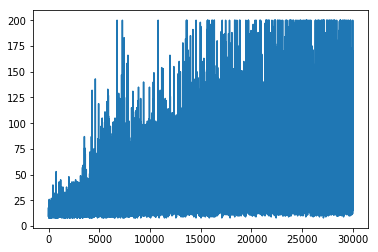

In [15]:
agent = QLearningAgent(alpha=0.3, epsilon=0.25,
                       discount=0.99,
                       get_legal_actions=lambda s: range(
                           n_actions))

rewards = []
for i in range(30001):
    rewards.append(play_and_train(env, agent))

    # опционально: добавьте уменьшение eps
    if i % 1000 == 0:
        clear_output(True)
        print('eps =', agent.epsilon, 'mean reward =',
              np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()